Purpose: Investigate expression of modules under different variables (time point, stressor, tissue, etc.).<br>
Author: Anna Pardo<br>
Date initiated: Apr. 10, 2024

In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load module eigengenes
me = pd.read_csv("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/01_data/WGCNA_01-Apr-2024/module_eigengenes.csv",sep=",",header="infer")
me.head()

,Unnamed: 0,MElightcyan,MElightyellow,MEcyan,MEgrey60,MEwhite,MEdarkturquoise,MEblack,MEpurple,MEdarkorange,...,MEdarkgrey,MEyellow,MEblue,MEturquoise,MEdarkgreen,MEgreenyellow,MEmagenta,MEpink,MEgreen,MEorange
0,SRR11933261,-0.003489,-0.001360,0.005780,-0.010454,-0.004039,-0.001540,-0.004225,-0.003518,0.001276,...,0.006868,-0.006926,0.016846,0.009834,-0.005548,-0.005612,0.001916,0.002388,0.036065,0.006541
1,SRR11933272,0.003296,0.004404,0.025950,-0.001061,-0.003462,-0.001576,-0.006519,-0.005641,-0.002900,...,-0.001909,-0.010158,-0.001831,-0.006328,-0.005873,-0.008587,-0.009985,-0.012145,-0.000152,-0.000493
2,SRR11933250,-0.001542,0.003345,0.011615,-0.002805,-0.003565,-0.001540,-0.004919,-0.004374,-0.002502,...,0.005282,-0.006815,0.008395,0.010623,-0.004685,-0.000344,-0.003889,-0.004960,0.016068,0.006095
3,SRR11933029,-0.001068,0.003255,0.011365,-0.001558,-0.003674,-0.001572,-0.006291,-0.004321,-0.002627,...,0.001454,-0.010985,-0.005630,-0.001272,-0.004717,-0.007283,-0.004969,-0.003434,0.012716,0.001396
4,SRR11933040,-0.003114,-0.000867,0.002536,-0.013253,-0.001516,-0.001576,-0.006442,-0.005292,-0.002995,...,0.000688,-0.009798,-0.000316,0.004508,-0.004153,-0.008399,-0.008164,-0.009733,0.016587,-0.001352


In [3]:
me.rename(columns={"Unnamed: 0":"Sample"},inplace=True)

In [4]:
me.head()

,Sample,MElightcyan,MElightyellow,MEcyan,MEgrey60,MEwhite,MEdarkturquoise,MEblack,MEpurple,MEdarkorange,...,MEdarkgrey,MEyellow,MEblue,MEturquoise,MEdarkgreen,MEgreenyellow,MEmagenta,MEpink,MEgreen,MEorange
0,SRR11933261,-0.003489,-0.001360,0.005780,-0.010454,-0.004039,-0.001540,-0.004225,-0.003518,0.001276,...,0.006868,-0.006926,0.016846,0.009834,-0.005548,-0.005612,0.001916,0.002388,0.036065,0.006541
1,SRR11933272,0.003296,0.004404,0.025950,-0.001061,-0.003462,-0.001576,-0.006519,-0.005641,-0.002900,...,-0.001909,-0.010158,-0.001831,-0.006328,-0.005873,-0.008587,-0.009985,-0.012145,-0.000152,-0.000493
2,SRR11933250,-0.001542,0.003345,0.011615,-0.002805,-0.003565,-0.001540,-0.004919,-0.004374,-0.002502,...,0.005282,-0.006815,0.008395,0.010623,-0.004685,-0.000344,-0.003889,-0.004960,0.016068,0.006095
3,SRR11933029,-0.001068,0.003255,0.011365,-0.001558,-0.003674,-0.001572,-0.006291,-0.004321,-0.002627,...,0.001454,-0.010985,-0.005630,-0.001272,-0.004717,-0.007283,-0.004969,-0.003434,0.012716,0.001396
4,SRR11933040,-0.003114,-0.000867,0.002536,-0.013253,-0.001516,-0.001576,-0.006442,-0.005292,-0.002995,...,0.000688,-0.009798,-0.000316,0.004508,-0.004153,-0.008399,-0.008164,-0.009733,0.016587,-0.001352


In [5]:
# load metadata
md = pd.read_csv("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/01_data/metadata_corrected_14-Feb-2024.csv",sep=",",header="infer")

In [6]:
md.columns

Index(['Unnamed: 0', 'BioProject', 'Sample', 'sample_name', 'Replicate_num',
       'Genotype', 'Technology', 'Library_layout', 'Treatment',
       'Duration_hours', 'Time_after_treatment', 'Concentration_mM',
       'Concentration', 'Developmental_stage', 'Tissue', 'Day_length_hours',
       'Day_temp_C', 'Night_temp_C', 'Relative humidity (%)',
       'Light (umol/m2/s)', 'Growth Env.', 'Media', 'Notes'],
      dtype='object')

In [7]:
mdsub = md[["Sample","BioProject","Treatment","Duration_hours","Tissue","Developmental_stage"]]

In [8]:
# rename DroughtRepeat to Drought
mdsub["Treatment"].mask(mdsub["Treatment"]=="DroughtRepeat","Drought",inplace=True)

/tmp/ipykernel_3151/372681883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdsub["Treatment"].mask(mdsub["Treatment"]=="DroughtRepeat","Drought",inplace=True)


In [9]:
# plot histograms of duration_hours for each treatment
def plot_hist_duration(stressor):
    bps = list(mdsub[mdsub["Treatment"]==stressor]["BioProject"].unique())
    bpdf = mdsub[mdsub["BioProject"].isin(bps)]
    bptreatdf = bpdf[bpdf["Treatment"].isin(["Control",stressor])]
    plt.hist(bptreatdf["Duration_hours"],bins=100)
    plt.title(stressor,fontsize=20)
    plt.xlabel("Duration_hours")
    
    # find 25th, 50th, & 75th percentiles & save to a dictionary
    d = {25:bptreatdf["Duration_hours"].quantile(q=0.25),
        50:bptreatdf["Duration_hours"].quantile(q=0.5),
        75:bptreatdf["Duration_hours"].quantile(q=0.75)}
    
    print("25th percentile:",bptreatdf["Duration_hours"].quantile(q=0.25))
    print("50th percentile:",bptreatdf["Duration_hours"].quantile(q=0.5))
    print("75th percentile:",bptreatdf["Duration_hours"].quantile(q=0.75))
    
    return d

25th percentile: 840.0
50th percentile: 1344.0
75th percentile: 1872.0


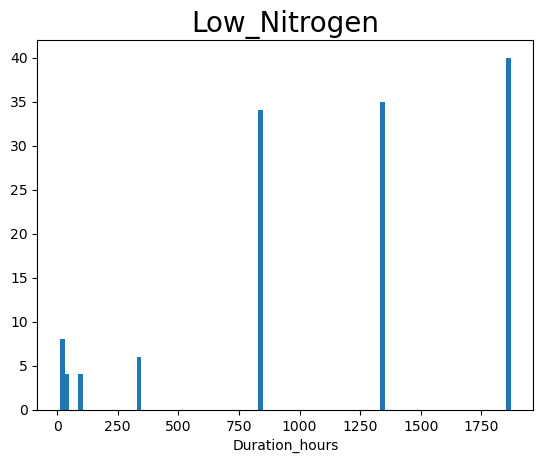

In [10]:
qd = {}
qd["Low_Nitrogen"] = plot_hist_duration("Low_Nitrogen")

25th percentile: 19.0
50th percentile: 168.0
75th percentile: 168.0


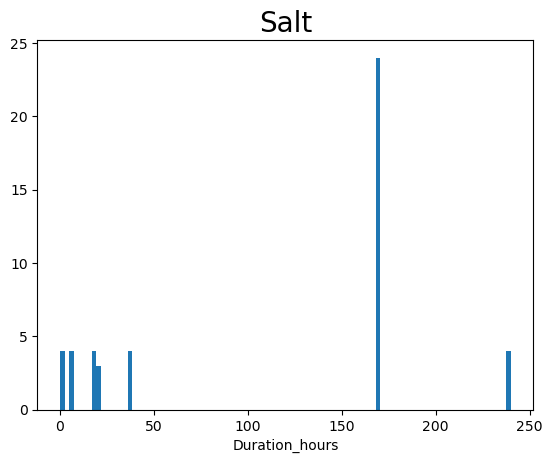

In [11]:
qd["Salt"] = plot_hist_duration("Salt")

25th percentile: 216.0
50th percentile: 216.0
75th percentile: 312.0


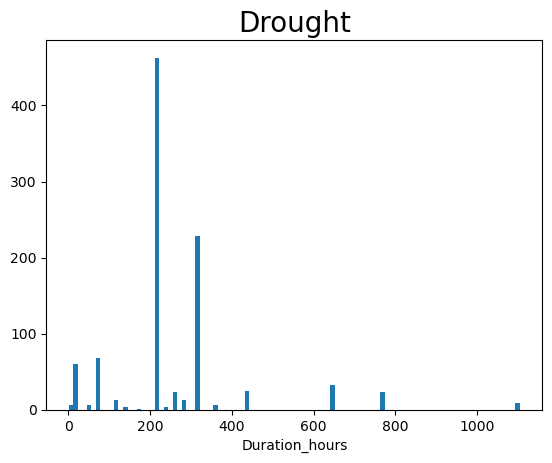

In [12]:
qd["Drought"] = plot_hist_duration("Drought")

25th percentile: 1.0
50th percentile: 2.0
75th percentile: 25.0


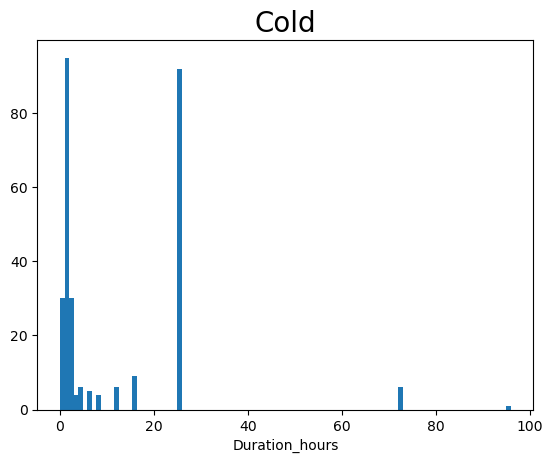

In [13]:
qd["Cold"] = plot_hist_duration("Cold")

25th percentile: 1.0
50th percentile: 4.0
75th percentile: 25.0


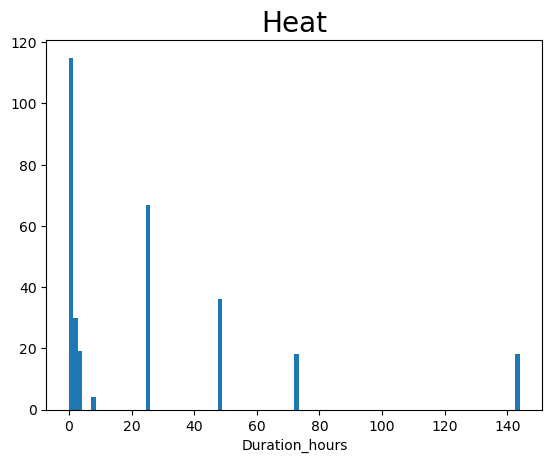

In [14]:
qd["Heat"] = plot_hist_duration("Heat")

25th percentile: 10.0
50th percentile: 24.0
75th percentile: 72.0


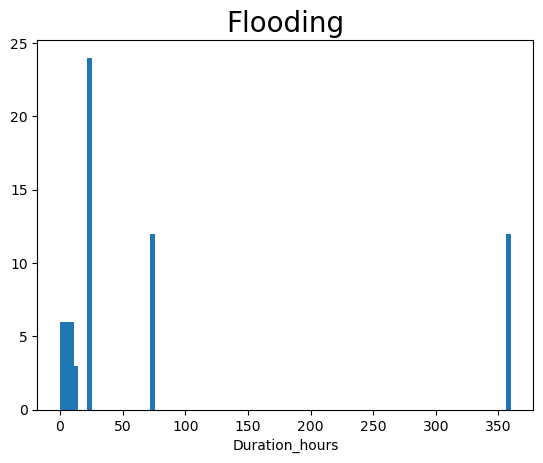

In [15]:
qd["Flooding"] = plot_hist_duration("Flooding")

In [16]:
# merge metadata and module eigengenes
memd = mdsub.merge(me)

In [17]:
# generate a dictionary in which the keys are developmental stages from the metadata and values indicate Vegetative or 
## Reproductive or Germination

devstage = {}
for d in memd["Developmental_stage"].unique():
    if type(d)==str:
        if d.startswith("V"):
            if d != "VT":
                devstage[d] = "Vegetative"
        elif "poll" in d:
            devstage[d] = "Reproductive"
        elif d=="4 days after sowing":
            devstage[d] = "Germination"
        elif d.startswith("R"):
            devstage[d] = "Reproductive"
        elif "DAP" in d:
            devstage[d] = "Reproductive"
        elif d=="14 days old":
            devstage[d] = "Vegetative"
        elif d=="Germination":
            devstage[d] = "Germination"
        elif d=="Two weeks old":
            devstage[d] = "Vegetative"
        elif d=="Seedling":
            devstage[d] = "Vegetative"
        elif d=="5 weeks old":
            devstage[d] = "Vegetative"
        elif d==">=V4":
            devstage[d] = "Vegetative"
        elif d=="45 days after germination":
            devstage[d] = "Vegetative"
        elif d=="Mature Plant":
            devstage[d] = "Reproductive"
            
        if d=="VT":
            devstage[d] = "Reproductive"

In [18]:
# generate a new column for vegetative or reproductive
memd["DevStage"] = memd["Developmental_stage"].map(devstage)

In [19]:
# make a similar column for the tissues: reduce to Photosynthetic (i.e. leaf, shoot, leaf meristem), root, stalk, & reproductive
tdict = {}
for t in list(memd["Tissue"].unique()):
    if t in ["Leaf","Leaf meristem","Shoot"]:
        tdict[t] = "Photosynthetic tissues"
    elif t=="Root":
        tdict[t] = t
    elif t=="Stalk":
        tdict[t] = t
    else:
        tdict[t] = "Reproductive tissues"

In [20]:
memd["TissueType"] = memd["Tissue"].map(tdict)

In [21]:
# add an early or late-stress column to the memd dataframe
## early stress = <50th percentile of Duration_hours column for that stressor; late stress = >50th percentile

dflist = []
for t in list(memd["Treatment"].unique()):
    if t != "Control":
        bps = list(memd[memd["Treatment"]==t]["BioProject"].unique())
        bpdf = memd[memd["BioProject"].isin(bps)]
        bptreatdf = bpdf[bpdf["Treatment"].isin(["Control",t])]
        
        checkval = qd[t][50]
        mapdict = {}
        for d in list(bptreatdf["Duration_hours"].unique()):
            if np.isnan(d)==False:
                if d<=checkval:
                    mapdict[d] = "Early"
                else:
                    mapdict[d] = "Late"
            else:
                mapdict[d] = np.nan
                
        bptreatdf["StressTiming"] = bptreatdf["Duration_hours"].map(mapdict)
        dflist.append(bptreatdf)

/tmp/ipykernel_3151/24193590.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bptreatdf["StressTiming"] = bptreatdf["Duration_hours"].map(mapdict)
/tmp/ipykernel_3151/24193590.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bptreatdf["StressTiming"] = bptreatdf["Duration_hours"].map(mapdict)
/tmp/ipykernel_3151/24193590.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [22]:
memd2 = pd.concat(dflist)

In [23]:
# define a function to plot a given module by treatment, tissue type, developmental stage (broadly), and early or late stress
def plot_module(module):
    col = "ME"+module
    if module=="grey60":
        cset = "grey"
    else:
        cset = module
    fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
    plt.suptitle(module,fontsize=24)
    a = sns.violinplot(ax=ax[0,0],x=memd2["Treatment"],y=memd2[col],color=cset)
    b = sns.violinplot(ax=ax[0,1],x=memd2["TissueType"],y=memd2[col],color=cset)
    c = sns.violinplot(ax=ax[1,0],x=memd2["DevStage"],y=memd2[col],color=cset)
    d = sns.violinplot(ax=ax[1,1],x=memd2["StressTiming"],y=memd2[col],color=cset)
    a.set_xlabel("Treatment",fontsize=14)
    a.set_ylabel("Module eigengene",fontsize=14)
    b.set_xlabel("Tissue Type",fontsize=14)
    b.set_ylabel("Module eigengene",fontsize=14)
    c.set_xlabel("Developmental Stage",fontsize=14)
    c.set_ylabel("Module eigengene",fontsize=14)
    d.set_xlabel("Stress Timing",fontsize=14)
    d.set_ylabel("Module eigengene",fontsize=14)
    plt.savefig("../../figures/module_eigengene_plots/"+module+"_eigengenes.svg",bbox_inches="tight")
    plt.savefig("../../figures/module_eigengene_plots/"+module+"_eigengenes.pdf",bbox_inches="tight")

In [24]:
# make list of modules
mods = []
for c in me.columns:
    if c.startswith("ME"):
        mods.append(c.split("E")[1])

In [25]:
for m in mods:
    plot_module(m)
    plt.clf()

/tmp/ipykernel_126/3508734534.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Repeat but with logTPM instead of module eigengenes

In [24]:
# we will use the log TPM that have been corrected for BioProject
logtpm = pd.read_csv("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/01_data/BPcombat_logTPM_forRF_1-Mar-2024.tsv",sep="\t",header="infer")

In [27]:
memd2.columns

Index(['Sample', 'BioProject', 'Treatment', 'Duration_hours', 'Tissue',
       'Developmental_stage', 'MElightcyan', 'MElightyellow', 'MEcyan',
       'MEgrey60', 'MEwhite', 'MEdarkturquoise', 'MEblack', 'MEpurple',
       'MEdarkorange', 'MElightgreen', 'MEroyalblue', 'MEdarkred', 'MEsalmon',
       'MEdarkgrey', 'MEyellow', 'MEblue', 'MEturquoise', 'MEdarkgreen',
       'MEgreenyellow', 'MEmagenta', 'MEpink', 'MEgreen', 'MEorange',
       'DevStage', 'TissueType', 'StressTiming'],
      dtype='object')

In [25]:
# pull out the relevant metadata from memd2
meta = memd2[["Sample","Treatment","DevStage","TissueType","StressTiming"]]

In [26]:
# transpose logtpm
ltpmt = logtpm.set_index("Sample").transpose()
ltpmt.head()

Sample,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,SRR11933475,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
Zm00001eb000010,3.594095,3.89444,3.219469,3.112365,3.375717,4.8903,4.968562,4.649948,4.324961,3.817649,...,2.775769,2.955871,2.779872,4.173646,2.698679,3.244666,2.912137,3.516813,3.350593,3.363847
Zm00001eb000020,2.519998,2.732825,2.701776,2.539248,2.654222,4.665918,4.470543,4.560385,3.469186,2.910953,...,2.870872,3.760582,2.870872,2.870872,3.798475,3.256155,3.011281,3.369846,3.148906,3.200188
Zm00001eb000050,-0.007294,0.381698,-0.061548,-0.061548,-0.061548,-0.061548,-0.061548,-0.061548,0.285041,0.314738,...,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096
Zm00001eb000060,3.905214,3.24937,2.384618,1.880675,1.658896,4.878115,4.535352,4.53655,4.055592,3.989186,...,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932
Zm00001eb000070,1.951832,1.059086,1.305216,1.068644,1.637151,2.239044,2.321033,1.955699,1.16447,1.021845,...,0.543188,1.490756,0.543188,2.328131,0.543188,0.543188,0.543188,0.543188,3.030062,1.963457


In [27]:
ltpmt = ltpmt.reset_index()
ltpmt.head()

Sample,index,SRR11933261,SRR11933272,SRR11933250,SRR11933029,SRR11933040,SRR11932822,SRR11932811,SRR11933230,SRR11932879,...,Ms71D3C,Ki3D1C,CML228D1D,CML333D3D,MO18WD3C,B73D3C,NC358D3C,P39D3D,M162WD3D,M162WD1D
0,Zm00001eb000010,3.594095,3.89444,3.219469,3.112365,3.375717,4.8903,4.968562,4.649948,4.324961,...,2.775769,2.955871,2.779872,4.173646,2.698679,3.244666,2.912137,3.516813,3.350593,3.363847
1,Zm00001eb000020,2.519998,2.732825,2.701776,2.539248,2.654222,4.665918,4.470543,4.560385,3.469186,...,2.870872,3.760582,2.870872,2.870872,3.798475,3.256155,3.011281,3.369846,3.148906,3.200188
2,Zm00001eb000050,-0.007294,0.381698,-0.061548,-0.061548,-0.061548,-0.061548,-0.061548,-0.061548,0.285041,...,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096,0.208096
3,Zm00001eb000060,3.905214,3.24937,2.384618,1.880675,1.658896,4.878115,4.535352,4.53655,4.055592,...,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932,3.684932
4,Zm00001eb000070,1.951832,1.059086,1.305216,1.068644,1.637151,2.239044,2.321033,1.955699,1.16447,...,0.543188,1.490756,0.543188,2.328131,0.543188,0.543188,0.543188,0.543188,3.030062,1.963457


In [28]:
ltpmt = ltpmt.rename(columns={"index":"GeneID"})

In [29]:
# load modgenes
modgenes = json.load(open("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/01_data/WGCNA_01-Apr-2024/genes_in_modules.json"))

In [30]:
# create a dictionary where key=module, value=logTPM dataframe with metadata for only genes in that module
ltpmdict = {}
for m,l in modgenes.items():
    df = ltpmt[ltpmt["GeneID"].isin(l)]
    df = df.set_index("GeneID").transpose().reset_index()
    df = pd.melt(df,id_vars=["Sample"],value_vars=l)
    ltpmdict[m] = df.merge(meta, how="left")

In [33]:
ltpmdict["blue"].head()

,Sample,GeneID,logTPM,Treatment,DevStage,TissueType,StressTiming
0,SRR11933261,Zm00001eb000050,-0.007294,Drought,Vegetative,Photosynthetic tissues,Late
1,SRR11933272,Zm00001eb000050,0.381698,Drought,Vegetative,Photosynthetic tissues,Early
2,SRR11933250,Zm00001eb000050,-0.061548,Drought,Vegetative,Photosynthetic tissues,Early
3,SRR11933029,Zm00001eb000050,-0.061548,Control,Vegetative,Photosynthetic tissues,Early
4,SRR11933040,Zm00001eb000050,-0.061548,Drought,Vegetative,Photosynthetic tissues,Late


In [32]:
for k,v in ltpmdict.items():
    ltpmdict[k] = v.rename(columns={"value":"logTPM"})

In [44]:
for k,v in ltpmdict.items():
    v["logTPM"] = v["logTPM"].astype(float)
    ltpmdict[k] = v

In [39]:
len(ltpmdict["blue"].index)==len(test.index)

True

In [43]:
for i in list(ltpmdict["white"]["logTPM"]):
    if type(i) != float:
        print(type(i))

In [ ]:
sns.violinplot(x=ltpmdict["white"]["Sample"],y=ltpmdict["white"]["logTPM"])

/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [34]:
# make a new module plotting function
def plot_module_tpm(module):
    df = ltpmdict[module]
    if module=="grey60":
        cset = "grey"
    else:
        cset = module
    fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10),sharey=True)
    plt.suptitle(module,fontsize=24)
    a = sns.violinplot(ax=ax[0,0],x=df["Treatment"],y=df["logTPM"],color=cset)
    b = sns.violinplot(ax=ax[0,1],x=df["TissueType"],y=df["logTPM"],color=cset)
    c = sns.violinplot(ax=ax[1,0],x=df["DevStage"],y=df["logTPM"],color=cset)
    d = sns.violinplot(ax=ax[1,1],x=df["StressTiming"],y=df["logTPM"],color=cset)
    a.set_xlabel("Treatment",fontsize=14)
    a.set_ylabel("log TPM",fontsize=14)
    b.set_xlabel("Tissue Type",fontsize=14)
    b.set_ylabel("log TPM",fontsize=14)
    c.set_xlabel("Developmental Stage",fontsize=14)
    c.set_ylabel("log TPM",fontsize=14)
    d.set_xlabel("Stress Timing",fontsize=14)
    d.set_ylabel("log TPM",fontsize=14)
    plt.savefig("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/02_figures/module_expression_plots/"+module+"_logTPM_violinplot.svg",bbox_inches="tight")
    plt.savefig("/mnt/ufs18/rs-034/VanBuren_Lab/02_users/Anna_Haber/core-stress-transcriptome/02_figures/module_expression_plots/"+module+"_logTPM_violinplot.pdf",bbox_inches="tight")



/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/home/haberan2/miniconda3/envs/jupyter/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

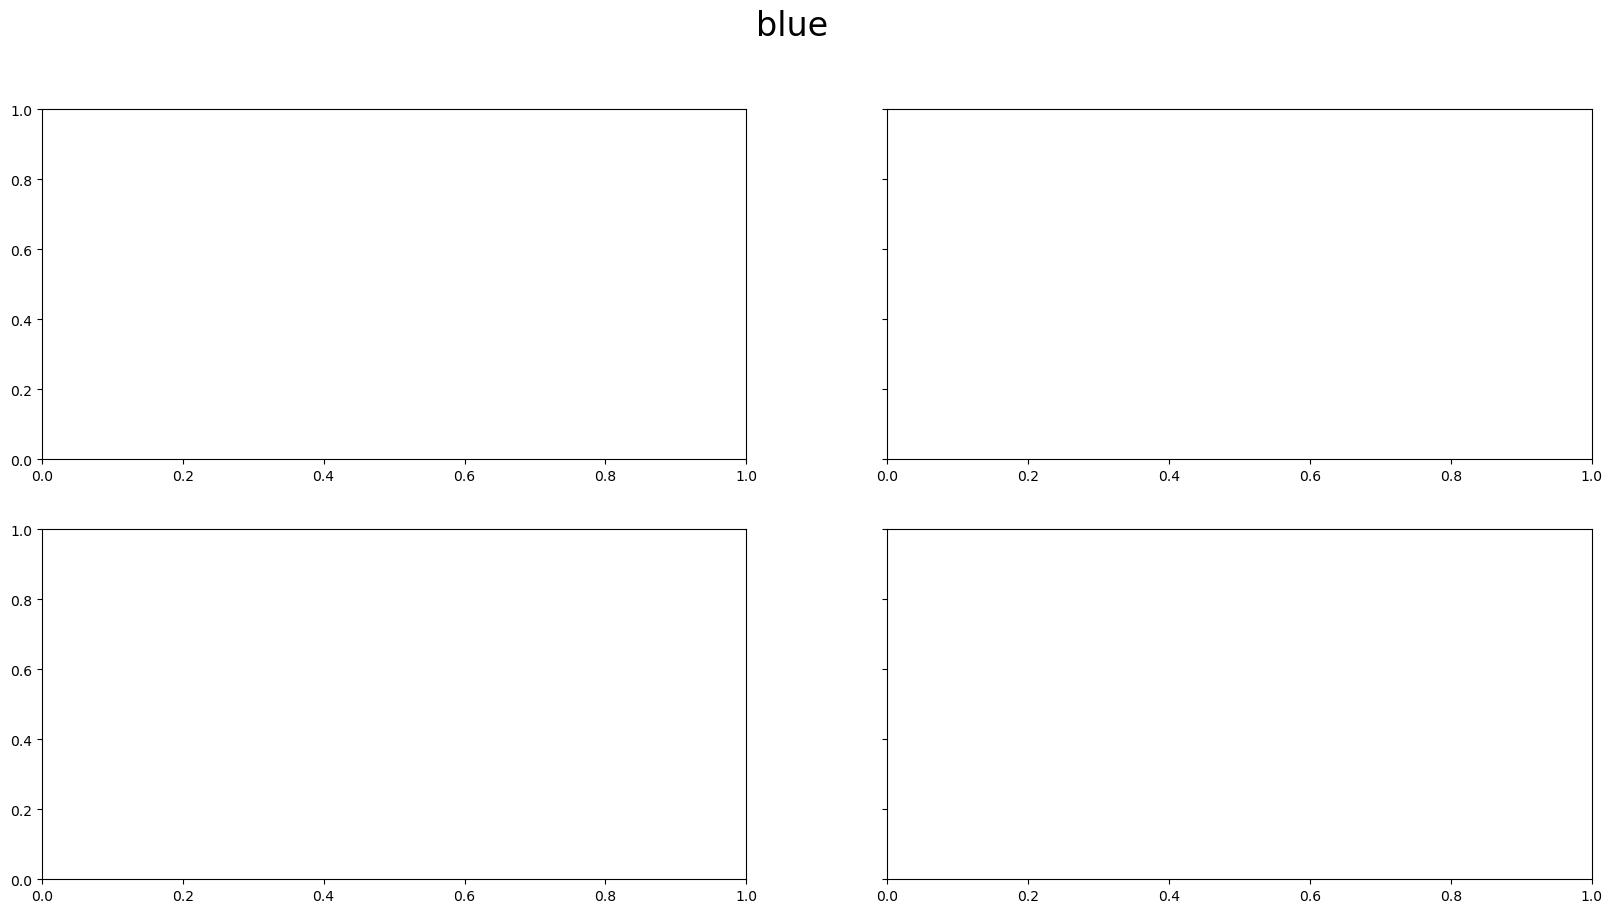

In [35]:
for m in list(ltpmdict.keys()):
    plot_module_tpm(m)
    plt.clf()